# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following points:

* 1 - Import Data & Libraries
* 2 - Wrangling and Cleaning Time-series Data
* 3 - Time-series Analysis: Decomposition
* 4 - Testing for Stationarity
    * I) Dickey Fuller Test
    * II) Chek out Autocorrelations

---

## 1. Import Data & Libraries

In [92]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import statsmodels.api as sm
import os
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

In [93]:
# Configure API key 

quandl.ApiConfig.api_key = 'S9t7fHBbod1sn7KC79Wz'

In [94]:
# Importing the "Producer Price Index by Commodity for Special Indexes: Apples" data set.

data = quandl.get('FRED/WPUSI01102A')

In [95]:
data.head(5)

,Value
Date,
2008-06-01,100.0
2008-07-01,100.0
2008-08-01,102.4
2008-09-01,124.3
2008-10-01,121.1


In [96]:
data.shape

(164, 1)

In [97]:
data.columns

Index(['Value'], dtype='object')

In [98]:
type(data)

pandas.core.frame.DataFrame

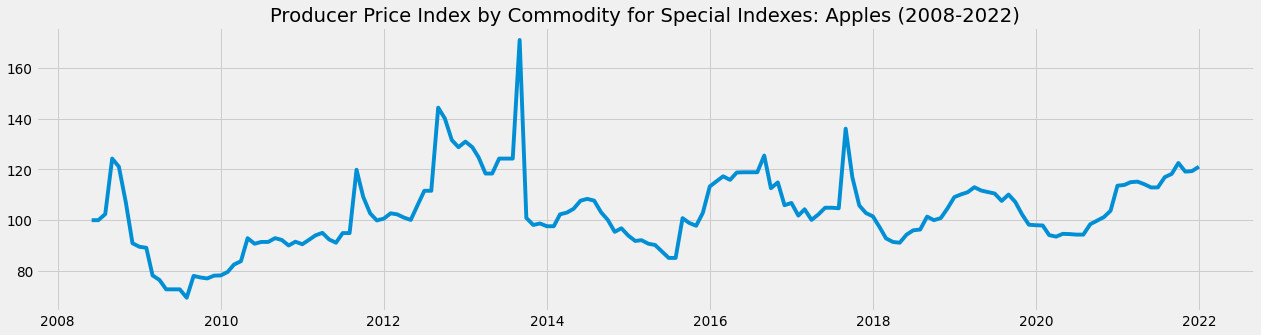

In [110]:
# Plot the data using matplotlib.

plt.figure(figsize=(20,5), dpi=70)
plt.title("Producer Price Index by Commodity for Special Indexes: Apples (2008-2022)")
plt.plot(data)

#df = px.data.gapminder().query('Date')
#fig = px.line(df, x="Date", y="Value", title='Producer Price Index by Commodity for Special Indexes: Apples')
#fig.show()

## 2. Wrangling and Cleaning Time-series Data

In [100]:
# Check for missing values

data.isnull().sum() 

Value    0
dtype: int64

In [101]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# No dups!

0

## 3. Time-series Analysis: Decomposition

In [102]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [103]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

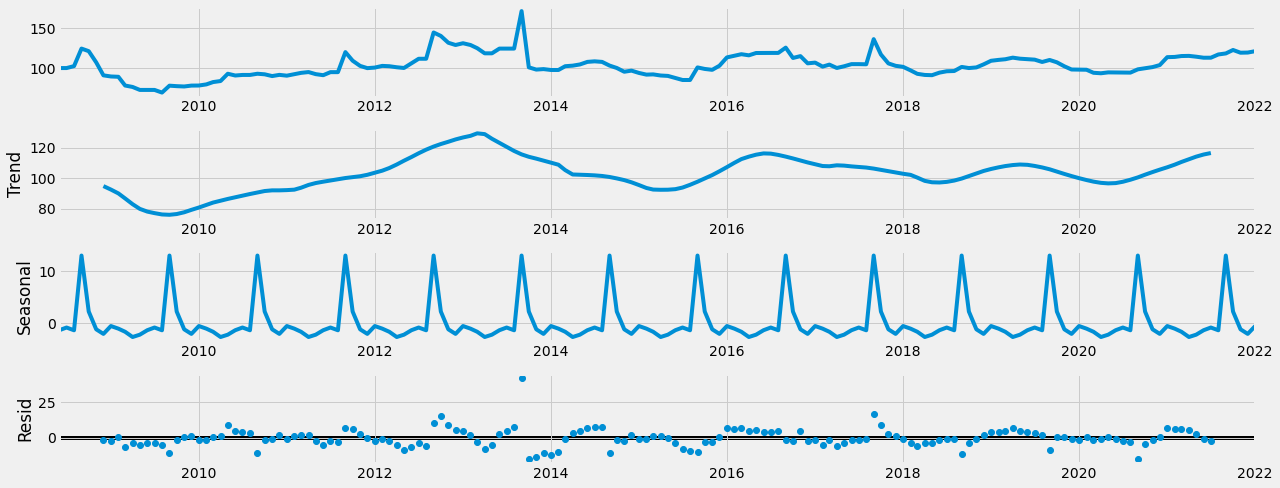

In [112]:
# Plot the separate components

decomposition.plot()
plt.show()

### Analysis Results

- **Trend:** Although there are constant ups and downs, there is a constant increase in the price of apples if we compare the evolution from the first to the last data point.
- **Sessionality:** A peak is observed for each year, specifically in August or September.
- **Noise:** There are cases above all of the components, specifically in 2013, which is has the highest point in the whole data.

## 4. Testing for Stationarity

### I) Dickey Fuller Test

In [105]:
# Carry out the Dickey Fuller Test thorugh the adfuller() function.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries       ): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.097151
p-value                          0.026765
Number of Lags Used              1.000000
Number of Observations Used    162.000000
Critical Value (1%)             -3.471374
Critical Value (5%)             -2.879552
Critical Value (10%)            -2.576373
dtype: float64


### Analysis Results

- Test Statistic = -3.10
- Critial Vaulue = -2.88
- Significance level = 0.05 or 5%
- Results = -3.10 < -2.88

#### The value of the Test Statistic (-3.10) is smaller than the Critical Value of 5% (-2.88). With these results, we are able to reject our null hypothesis since there is no unit root present and our data is stationary.

### II) Chek out Autocorrelations

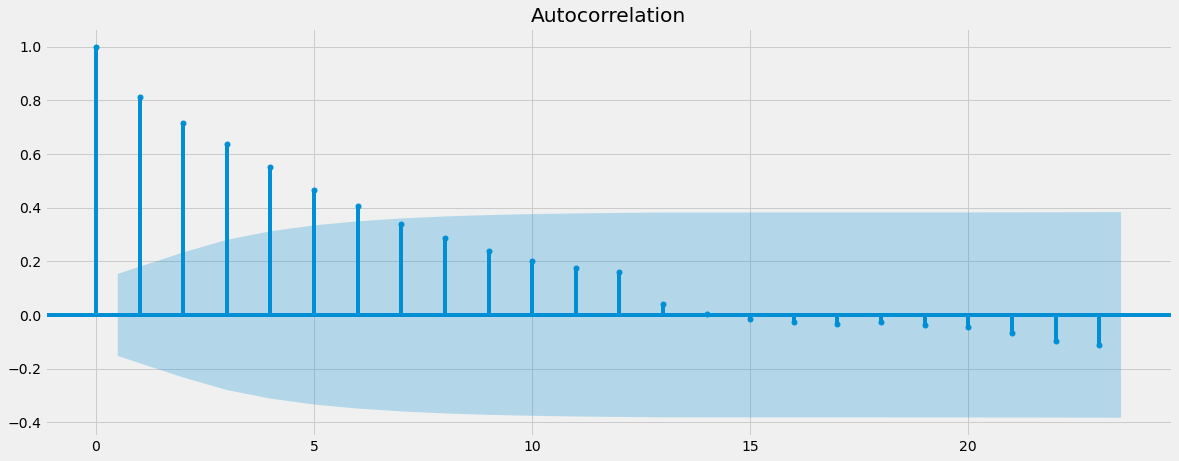

In [106]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(data)
plt.show()

### Analysis Results

Considering both approaches, we can affirm that the data is stationary. However, even though the Dickey-Fuller test says that the data is stationary, that stationarity is weak because there are still autocorrelated values (lags that are significantly correlated with each other). Although the model could be improved by carrying out another round of differentiation, it's unnecessary in this context since there are no more than 10 significant lags.